In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Librariesauxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.8.0-rc1


In [17]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [19]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

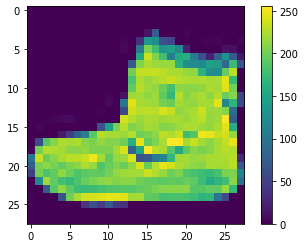

In [20]:
#Se você inspecionar a primeira imagem do conjunto de treinamento, você verá que os valores dos pixels estão entre 0 e 255:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [21]:
train_images = train_images/255.0
test_images = test_images/255.0

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [25]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])


In [26]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 2s 939us/step - loss: 0.4978 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 2s 865us/step - loss: 0.3738 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 2s 825us/step - loss: 0.3367 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 2s 830us/step - loss: 0.3133 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 2s 923us/step - loss: 0.2929 - accuracy: 0.8938
Epoch 6/10
1875/1875 [==============================] - 2s 833us/step - loss: 0.2821 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 2s 853us/step - loss: 0.2680 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 2s 858us/step - loss: 0.2571 - accuracy: 0.9052
Epoch 9/10
1875/1875 [==============================] - 2s 870us/step - loss: 0.2471 - accuracy: 0.9093
Epoch 10/10
1875/1875 [==============================] - 2s 864u

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n Test accuracy: ', test_acc)

313/313 - 0s - loss: 0.3508 - accuracy: 0.8741 - 323ms/epoch - 1ms/step

 Test accuracy:  0.8741000294685364


In [30]:
predictions = model.predict(test_images)

predictions

array([[4.92680783e-07, 2.42955736e-08, 4.83786389e-09, ...,
        4.89502139e-02, 5.84017073e-07, 9.50440109e-01],
       [3.55119351e-04, 5.75056192e-12, 9.93272543e-01, ...,
        1.49924240e-20, 4.94604878e-11, 6.54202720e-17],
       [2.17103691e-09, 1.00000000e+00, 2.42754514e-12, ...,
        1.01805996e-22, 5.34671428e-13, 1.53885819e-17],
       ...,
       [1.72876262e-05, 3.07997855e-12, 7.88275713e-07, ...,
        2.97647629e-10, 9.99976397e-01, 8.45909511e-14],
       [2.58734083e-08, 9.99985456e-01, 4.55232137e-11, ...,
        2.84090033e-16, 3.83796217e-10, 2.00115402e-12],
       [2.63676357e-05, 1.27064780e-07, 1.18414880e-06, ...,
        2.26157019e-03, 1.21309626e-04, 3.96502264e-06]], dtype=float32)

In [31]:
print(predictions[0])
np.argmax(predictions[0])

[4.9268078e-07 2.4295574e-08 4.8378639e-09 4.3032930e-10 4.7229963e-11
 6.0862250e-04 1.9886208e-08 4.8950214e-02 5.8401707e-07 9.5044011e-01]


9